In [5]:
import pywt
import matplotlib.pyplot as plt
import numpy as np

In [6]:
fs = 1000
N = 200
k = np.arange(200)
frq = k*fs/N
frq1 = frq[range(int(N/2))]

In [20]:
# 读取数据
import pandas as pd
data = pd.read_excel('../Resource/ExperimentDataBase/CV1(1).xlsx')

In [21]:
data.head()

,SAVI,EVI,TCART,CIrededge１,DVI,OSAVI,RDVI,TVI,MNVI,MSAVI,MTVI,CV
0,0.394629,0.383929,0.209295,0.247484,0.200040,0.475878,0.392039,13.330532,5.008147,0.000510,0.074236,0.5827
1,0.200114,0.179832,0.084067,0.114146,0.080682,0.304724,0.249262,5.372898,5.737333,-0.278963,0.032676,0.3358
2,0.318954,0.300633,0.153540,0.210359,0.146928,0.418618,0.336207,9.791171,5.371085,-0.114998,0.056766,0.6749
3,0.439483,0.435977,0.249560,0.346168,0.237352,0.504890,0.426224,15.819550,4.723679,0.069591,0.085574,0.6258
4,0.442455,0.439432,0.251764,0.348997,0.239668,0.507217,0.428720,15.980725,4.710130,0.074714,0.086328,0.7649


In [31]:
import pandas as pd
import numpy as np
import pyperclip

# 将从Excel中复制的数据粘贴到剪贴板中
data_from_excel = pyperclip.paste()

# 将数据转换为一维数组
data_array = np.array(pd.read_clipboard(header=None, sep='\t', dtype=str).iloc[:, 0])

# 打印数组
print(data_array)


['0.5827' '0.3358' '0.6749' '0.6258' '0.7649' '0.5976' '0.5668' '0.8759'
 '0.6307' '0.6926' '0.7684' '0.6236' '0.6151' '0.6748' '0.9227' '0.4172'
 '0.2139' '0.4417' '0.5153' '0.5577' '0.5682' '0.3044' '0.9266' '0.6793'
 '0.7057' '0.7153' '0.8613' '0.7561' '0.6987' '0.6053' '0.8068' '0.4692'
 '0.6173' '0.7988' '0.6333' '0.5243' '0.7013' '0.8098' '0.5339' '0.5922'
 '0.553' '0.4926' '0.0775' '0.0582' '0.3432' '0.4351' '0.4734' '0.4298'
 '0.4529' '0.727' '0.3005' '0.704' '0.4464' '0.4395' '0.4999' '0.3563'
 '0.4064' '0.3218' '0.4457' '0.425' '0.5431' '0.4419' '0.5424' '0.3988'
 '0.4015' '0.4969']


In [23]:
aa = []
for i in range(200):
    aa.append(np.sin(0.3*np.pi*i))
for i in range(200):
    aa.append(np.sin(0.13*np.pi*i))
for i in range(200):
    aa.append(np.sin(0.05*np.pi*i))
y = aa

[0.0, 0.8090169943749475, 0.9510565162951536, 0.3090169943749475, -0.587785252292473, -1.0, -0.5877852522924734, 0.3090169943749472, 0.9510565162951535, 0.8090169943749476, 3.6739403974420594e-16, -0.8090169943749472, -0.9510565162951538, -0.3090169943749479, 0.5877852522924727, 1.0, 0.5877852522924736, -0.3090169943749451, -0.9510565162951534, -0.8090169943749468, -7.347880794884119e-16, 0.8090169943749459, 0.9510565162951539, 0.30901699437494656, -0.5877852522924725, -1.0, -0.5877852522924739, 0.3090169943749482, 0.9510565162951533, 0.8090169943749491, 1.102182119232618e-15, -0.8090169943749478, -0.951056516295154, -0.3090169943749503, 0.5877852522924693, 1.0, 0.5877852522924742, -0.30901699437494445, -0.9510565162951542, -0.8090169943749472, -1.4695761589768238e-15, 0.8090169943749455, 0.9510565162951552, 0.30901699437494723, -0.5877852522924718, -1.0, -0.5877852522924716, 0.30901699437494745, 0.951056516295153, 0.8090169943749496, 5.3896838775215305e-15, -0.8090169943749473, -0.951

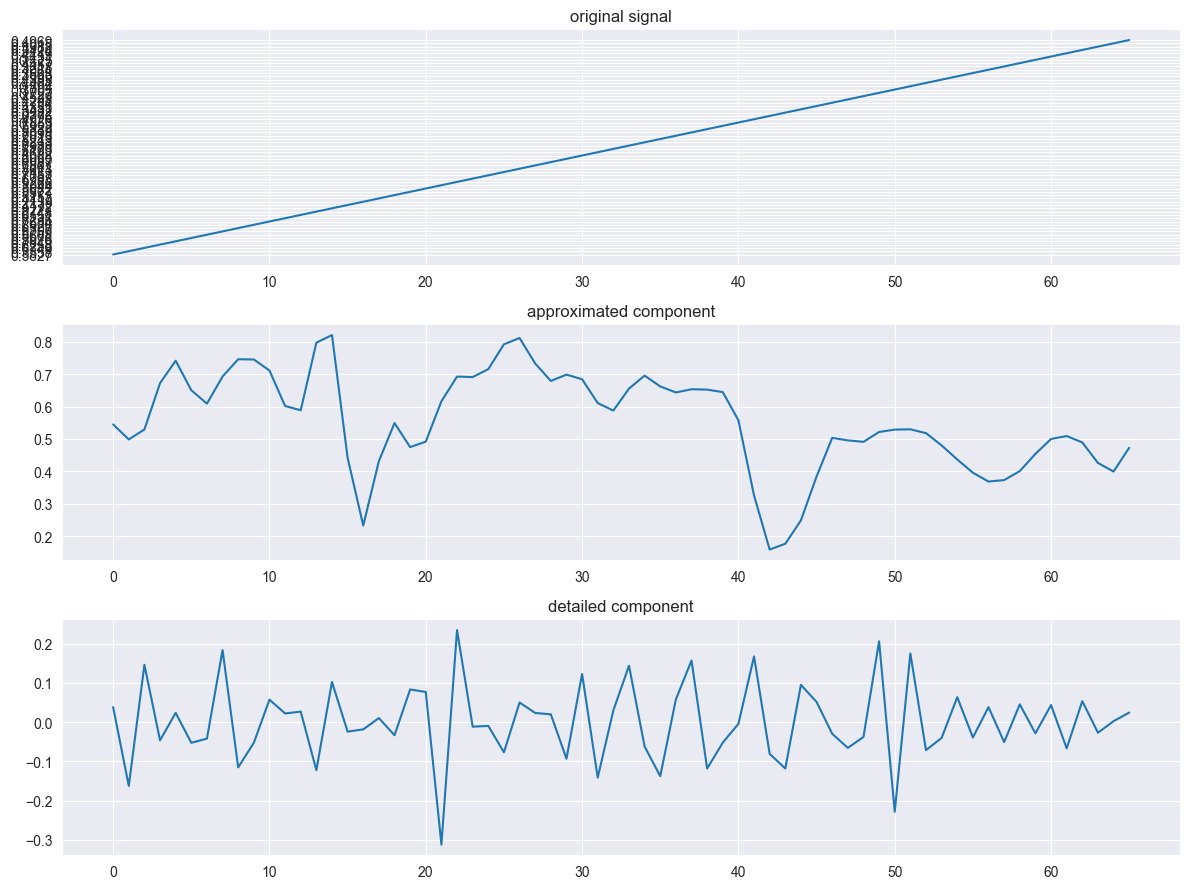

In [32]:
wavename = 'db5'
cA, cD = pywt.dwt(data_array, wavename)
ya = pywt.idwt(cA, None, wavename, 'smooth')  # approximated component
yd = pywt.idwt(None, cD, wavename, 'smooth')  # detailed component
x = range(len(data_array))
plt.figure(figsize=(12, 9))
plt.subplot(311)
plt.plot(x, data_array)
plt.title('original signal')
plt.subplot(312)
plt.plot(x, ya)
plt.title('approximated component')
plt.subplot(313)
plt.plot(x, yd)
plt.title('detailed component')
plt.tight_layout()
plt.show()

In [34]:
from openpyxl.utils.dataframe import dataframe_to_rows
import pandas as pd
import pywt
import openpyxl

# 假设你已经定义了 wavename、data_array、cA 和 cD 变量

# 将近似分量和细节分量保存到DataFrame中
df = pd.DataFrame({'Approximation': pywt.idwt(cA, None, wavename, 'smooth'),
                   'Detail': pywt.idwt(None, cD, wavename, 'smooth')})

# 将原始数据添加到DataFrame中
df['Original'] = data_array

# 创建一个新的Excel工作簿
wb = openpyxl.Workbook()

# 将DataFrame写入Excel工作表中
ws = wb.active
for r in dataframe_to_rows(df, index=False, header=True):
    ws.append(r)

# 将Excel文件保存到磁盘上
wb.save('wavelet_data.xlsx')


IndexError: index 37 is out of bounds for axis 0 with size 37

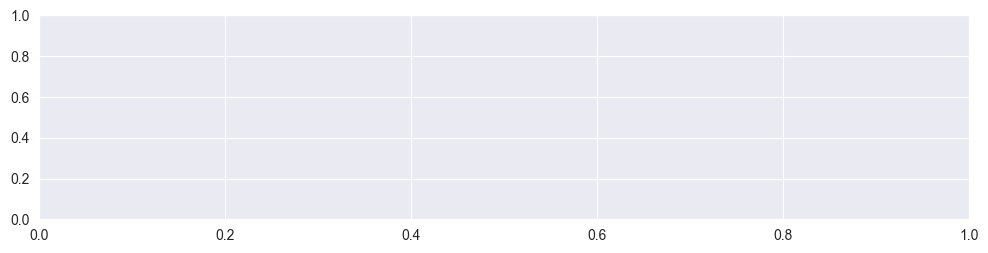

In [33]:
# # 图像单边谱
# plt.figure(figsize=(12, 9))
# plt.subplot(311)
# data_f = abs(np.fft.fft(cA))/N
# data_f1 = data_f[range(int(N/2))]
# plt.plot(frq1, data_f1, 'red')
#
# plt.subplot(312)
# data_ff = abs(np.fft.fft(cD))/N
# data_f2 = data_ff[range(int(N/2))]
# plt.plot(frq1, data_f2, 'k')
#
#
# plt.xlabel('pinlv(hz)')
# plt.ylabel('amplitude')
#
# plt.show()